In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import category_encoders as ce


In [2]:
# data read 
df = pd.read_excel('DS_Intern_Assignment_-_2020.xlsx', sheet_name=1) 
citydf = pd.read_excel('DS_Intern_Assignment_-_2020.xlsx', sheet_name=2)

In [3]:
# data type of each column
inputData = df
tempData  = inputData
inputData.dtypes


Employer_ID                    float64
City_ID                          int64
Contract_ID                      int64
StartDate               datetime64[ns]
EndDate                 datetime64[ns]
Renewal_Flag                     int64
Job_Slots                        int64
Total_Contract_Value             int64
Applications                     int64
Apply_Start_Clicks               int64
Click_Market_Value             float64
Job_Listings                     int64
dtype: object

In [4]:
# Total unique clients
print("Total no of unique clients",inputData['Employer_ID'].nunique())

Total no of unique clients 11458


In [5]:
# Total records 
print("Total no of clients",inputData['Employer_ID'].count())

Total no of clients 37757


In [6]:
# Checking null values
inputData.isnull().sum()

Employer_ID             0
City_ID                 0
Contract_ID             0
StartDate               0
EndDate                 0
Renewal_Flag            0
Job_Slots               0
Total_Contract_Value    0
Applications            0
Apply_Start_Clicks      0
Click_Market_Value      0
Job_Listings            0
dtype: int64

In [7]:
# Joining with the location data

inputData = pd.merge(left = inputData,right =citydf)
inputData.head(10)

,Employer_ID,City_ID,Contract_ID,StartDate,EndDate,Renewal_Flag,Job_Slots,Total_Contract_Value,Applications,Apply_Start_Clicks,Click_Market_Value,Job_Listings,City_Name,State_ID,State_Name
0,4.277920e+06,9767,2423796,2017-10-30,2017-11-30 23:59:59.000,1,15,995,215,255,15484.40,25,Kaser,NY,New York
1,1.747093e+06,9767,2123400,2017-07-19,2017-08-18 23:59:59.000,1,15,1745,20,145,3131.20,0,Kaser,NY,New York
2,2.833227e+06,9767,1895796,2017-04-22,2017-05-21 23:59:59.000,1,15,495,80,120,726.20,20,Kaser,NY,New York
3,1.827813e+06,9767,1283400,2016-08-03,2016-09-02 23:59:59.000,1,15,495,20,45,1852.10,0,Kaser,NY,New York
4,2.234880e+06,9767,2021376,2017-06-12,2017-07-11 23:59:59.000,1,15,745,85,95,2339.50,0,Kaser,NY,New York
5,2.329493e+06,9767,2647404,2018-01-11,2018-02-10 23:59:59.000,1,15,745,0,105,3771.65,20,Kaser,NY,New York
6,2.372987e+06,8585,2074128,2017-06-29,2017-07-29 23:59:59.000,0,50,1495,55,70,1719.30,50,Mexico,PA,Pennsylvania
7,6.374133e+06,8585,2601492,2017-12-24,2018-01-23 23:59:59.000,0,15,995,260,400,6631.70,0,Mexico,PA,Pennsylvania
8,5.354907e+06,8585,2352312,2017-10-06,2017-10-23 13:14:12.940,0,15,1245,30,45,1320.30,0,Mexico,PA,Pennsylvania
9,3.442213e+06,8585,2194572,2017-08-12,2017-09-08 21:29:21.847,0,15,1495,0,0,0.00,0,Mexico,PA,Pennsylvania


In [8]:
#converting STATE_ID column to string
toString = ['State_ID']
#toString = ['City_ID']
inputData[toString] = inputData[toString].astype(str)

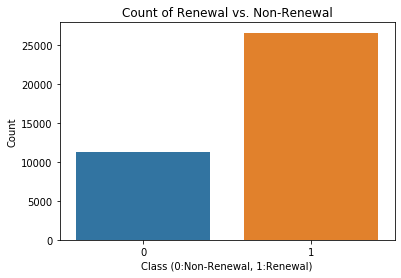

In [9]:
# Renewal vs non-renewal 
counts = inputData.Renewal_Flag.value_counts()
sns.barplot(x = counts.index, y= counts)
plt.title('Count of Renewal vs. Non-Renewal')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Renewal, 1:Renewal)')
#plt.hist(inputData['Renewal_Flag'])
plt.show()

In [10]:
# Total no of renewals and non-renewals

print("Total companies which have renewed their contract - ", (inputData['Renewal_Flag']==1).sum())
print("Total companies which didn't renewed their contract - ",(inputData['Renewal_Flag']==0).sum())

Total companies which have renewed their contract -  26558
Total companies which didn't renewed their contract -  11199


In [11]:
#creating meaningfull starting and ending contract period

inputData['StartDate_Month'] = inputData['StartDate'].dt.month
inputData['StartDate_Year'] = inputData['StartDate'].dt.year
inputData['EndDate_Month'] = inputData['EndDate'].dt.month
inputData['EndDate_Year'] = inputData['EndDate'].dt.year

y = inputData['Renewal_Flag'] 

In [12]:
# Droping non-meaningfull features 

toRemove = ['Contract_ID', 'Renewal_Flag','Employer_ID','StartDate','EndDate','StartDate_Year','EndDate_Year','City_ID', 'City_Name', 'State_Name','StartDate_Year', 'EndDate_Year']
inputData = inputData.drop(toRemove, axis = 1)
inputData.head()

,Job_Slots,Total_Contract_Value,Applications,Apply_Start_Clicks,Click_Market_Value,Job_Listings,State_ID,StartDate_Month,EndDate_Month
0,15,995,215,255,15484.4,25,NY,10,11
1,15,1745,20,145,3131.2,0,NY,7,8
2,15,495,80,120,726.2,20,NY,4,5
3,15,495,20,45,1852.1,0,NY,8,9
4,15,745,85,95,2339.5,0,NY,6,7


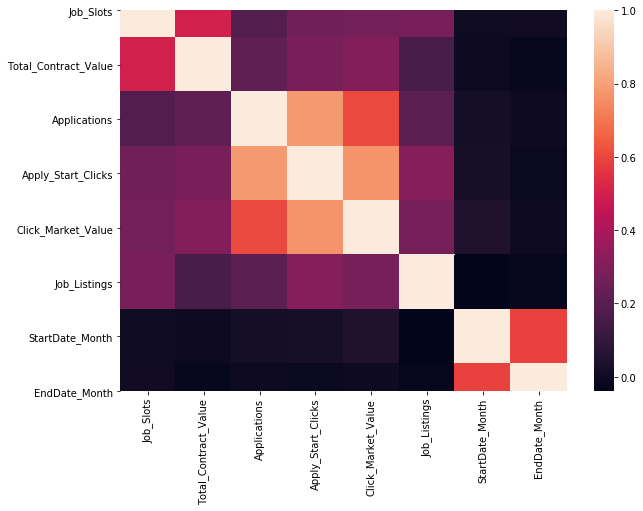

In [13]:
# heatmap to check correlation - multi colinearity

numeric = inputData.select_dtypes(include = ['int64', 'float64']).columns
corr = inputData[numeric].corr()

plt.figure(figsize = (10, 7))

sns.heatmap(corr)
plt.show()

In [14]:
# collinearity for all the features

corr

,Job_Slots,Total_Contract_Value,Applications,Apply_Start_Clicks,Click_Market_Value,Job_Listings,StartDate_Month,EndDate_Month
Job_Slots,1.000000,0.501434,0.182335,0.261592,0.265866,0.278940,-0.000554,0.004385
Total_Contract_Value,0.501434,1.000000,0.217718,0.279212,0.308356,0.163160,-0.004968,-0.022181
Applications,0.182335,0.217718,1.000000,0.782202,0.602342,0.205414,0.015768,-0.005554
Apply_Start_Clicks,0.261592,0.279212,0.782202,1.000000,0.770510,0.312140,0.022098,-0.012641
Click_Market_Value,0.265866,0.308356,0.602342,0.770510,1.000000,0.276540,0.049370,-0.004587
Job_Listings,0.278940,0.163160,0.205414,0.312140,0.276540,1.000000,-0.038813,-0.023289
StartDate_Month,-0.000554,-0.004968,0.015768,0.022098,0.049370,-0.038813,1.000000,0.590168
EndDate_Month,0.004385,-0.022181,-0.005554,-0.012641,-0.004587,-0.023289,0.590168,1.000000


In [15]:
# inputData.dtypes
categorical = list(inputData.select_dtypes(include = ['object']).columns)
numeric = list(inputData.select_dtypes(include = ['int64', 'float64']).columns)

In [16]:
# scale numeric variables

scaler = StandardScaler()
inputData[numeric] = scaler.fit_transform(inputData[numeric])
inputData.head()

,Job_Slots,Total_Contract_Value,Applications,Apply_Start_Clicks,Click_Market_Value,Job_Listings,State_ID,StartDate_Month,EndDate_Month
0,-0.239731,-0.062241,1.293977,0.689863,2.480265,2.396895,NY,0.946950,1.240523
1,-0.239731,1.372714,-0.211514,0.209138,0.117050,-0.403302,NY,0.094982,0.396734
2,-0.239731,-1.018877,0.251714,0.099882,-0.343036,1.836856,NY,-0.756987,-0.447054
3,-0.239731,-1.018877,-0.211514,-0.227885,-0.127647,-0.403302,NY,0.378971,0.677997
4,-0.239731,-0.540559,0.290317,-0.009374,-0.034405,-0.403302,NY,-0.189008,0.115471


In [17]:
# Encode categorical variables

encoders = {}
for each in categorical:
    encoder = ce.BinaryEncoder(cols=[each])
    dfbin = encoder.fit_transform(inputData[each])
    inputData = pd.concat([inputData, dfbin],axis = 1)
    inputData = inputData.drop([each], axis = 1)


In [18]:
# Model Testing (Encoding State_ID by One hot encoding)

# from sklearn.preprocessing import OneHotEncoder
# enc = OneHotEncoder(handle_unknown='ignore')
# enc_df = pd.DataFrame(enc.fit_transform(inputData[['State_ID']]).toarray())
# inputData = inputData.join(enc_df)
# inputData.head(10)


I have design a metric called Profit-per-application. It measures the profit of the client per application.
$(Profit   per   application = Click Market   Value - Total   Contract   Value)  $

In [19]:
tempData['Total_Contract_Value'] = tempData['Total_Contract_Value'].astype(float)
tempData['Profit'] = (tempData['Click_Market_Value'] - tempData['Total_Contract_Value']) 
tempData.head()

,Employer_ID,City_ID,Contract_ID,StartDate,EndDate,Renewal_Flag,Job_Slots,Total_Contract_Value,Applications,Apply_Start_Clicks,Click_Market_Value,Job_Listings,Profit
0,4.277920e+06,9767,2423796,2017-10-30 00:00:00.000,2017-11-30 23:59:59.000,1,15,995.0,215,255,15484.40,25,14489.40
1,2.372987e+06,8585,2074128,2017-06-29 00:00:00.000,2017-07-29 23:59:59.000,0,50,1495.0,55,70,1719.30,50,224.30
2,1.142693e+06,6665,1924740,2017-05-02 00:00:00.000,2017-06-02 23:59:59.000,0,15,495.0,45,95,1195.75,20,700.75
3,1.353893e+06,5165,1942512,2017-05-09 00:00:00.000,2017-06-06 23:59:59.000,0,15,995.0,155,175,1197.35,20,202.35
4,9.224267e+05,3882,1380984,2016-09-19 15:14:21.707,2016-10-20 15:14:20.707,1,15,745.0,150,185,8889.70,20,8144.70


##  Performance by Job Slot

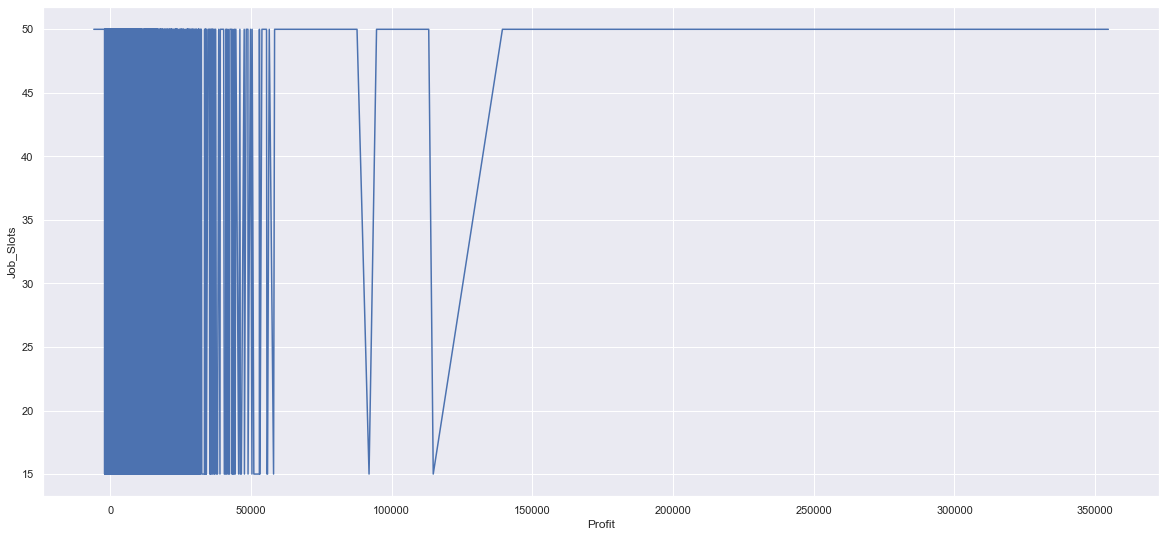

In [20]:
plt.figure(figsize=(20,9))
sns.set(style='darkgrid')
sns.lineplot(x='Profit', y='Job_Slots', data=tempData)

In [21]:
# Co-relation between Profit_per_Application and Job Slot
job = ['Job_Slots','Profit']
tempData[job].corr()

,Job_Slots,Profit
Job_Slots,1.000000,0.221528
Profit,0.221528,1.000000


## Performance by Total_Contract_Value

In [ ]:
plt.figure(figsize=(20,9))
sns.set(style='darkgrid')
sns.lineplot(x='Profit', y='Total_Contract_Value', data=tempData)

In [ ]:
# Co-relation between Profit_per_Application and Total_Contract_Value
contract = ['Total_Contract_Value','Profit']
tempData[contract].corr()

##  Performance by Click_Market_Value


In [ ]:
plt.figure(figsize=(20,9))
sns.set(style='darkgrid')
sns.lineplot(x='Profit', y='Click_Market_Value', data=tempData)

In [ ]:
# Co-relation between Profit_per_Application and Job Slot
market = ['Click_Market_Value','Profit']
tempData[market].corr()

In [ ]:
# Split data into training and testing datasets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputData, y, test_size=0.2, random_state=123)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression, ElasticNetCV, SGDClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import AdaBoostClassifier


In [ ]:
models = {}
models['LR'] = LogisticRegression(max_iter = 10000, solver = 'liblinear')
#models['LDA'] = LinearDiscriminantAnalysis()
#models['KNN'] = KNeighborsClassifier()
models['CART'] = DecisionTreeClassifier()
models['XGB'] = XGBClassifier()
models['RF'] = RandomForestClassifier(n_estimators=100)
models['ADA'] = AdaBoostClassifier()
#models['RidgeRegression'] = LogisticRegression(penalty = 'elasticnet', max_iter = 10000, solver = 'saga', l1_ratio = 0.1)


results = []
names = []

scoring = {'acc':'accuracy', 'precision':'precision', 'recall':'recall', 'f1':'f1'}

for name, model in models.items():
    kfold = KFold(n_splits = 10)
    #cv_results = cross_val_score(model, X_train, y_train, cv = kfold, scoring = 'f1')
    scores = cross_validate(model, X_train, y_train, cv = kfold, scoring = scoring, return_train_score = True, return_estimator = True)
    results.append(scores)
    names.append(name)
    #print(name, ":", scores)#, "(", scores, ")"
    print(name)
    for key, value in scores.items():
        if(key == 'estimator'):
            print('Model Fitted')
            models[name] = value
        else:
            print(key, ':', value.mean())
    print("***************************************")

## Extra - Tree Classifier for Variable Selection

In [ ]:
# Feature Importance

from sklearn.ensemble import ExtraTreesClassifier

extra_tree_forest = ExtraTreesClassifier(n_estimators = 10, criterion ='entropy', max_features = 5)
#X = inputData[columns]

extra_tree_forest.fit(X_train, y_train)
#extra_tree_forest.fit(X, y)

cols = list(inputData.columns)
feature_importance = extra_tree_forest.feature_importances_
plt.figure(figsize = (10, 7))
fig = sns.barplot(cols, feature_importance)
plt.xlabel('Feature Labels') 
plt.ylabel('Feature Importances') 
plt.title('Comparison of different Feature Importances')
fig.set_xticklabels(cols, rotation = 90)
plt.show() 

I have used Extra Tree classifier to find the most important features. From the graph, we can say that Click_Market_Value, Total_Contract_Value, Applications, Apply_start_click are the major features that would help in retaining the customer. 

- I have taken state as a feature in the modelling process because some states are very big and there can be so many jobs in larger states as compared to other states and as state is a categorical variable, I have encoded the state using binary encoding. 
- I have also taken start_month of the contract and end_month of the contract into account beacuse as we see in real-life, hiring occurs more in the period of December- March and May- August. So because of such type of trends, I feel start_month and end_month plays a vital role.
- I have used K-Fold Cross Validation because we need a method that provides ample data for training the model and also leaves ample data for validation. This significantly reduces bias as we are using most of the data for fitting, and also significantly reduces variance as most of the data is also being used in validation set.
- I have used various models for the retention analysis but we can see from the results that XGBoost performs best among all the models. Parallel Processing, Regularization, Hnadling Missing Values are some of the reasons XGBoost performs better than the other models. It also reduces variances and bias, that's why it gives better results than other models.

As customers are very important to retain for the glassdoor,so missclassification can create a problem. Glassdoor will use the resources to retain the leaving customer, so prediction should be as accurate as poosible. Otherwise, missclassfication can lead to loss for GlassDoor. As a result, I am taking F1 score as a measure to predict retention. The F1 score for XGBoost is highest among all the models. 

## The F1 score XGBoost  for is 88.06% 

I want to take other factors into consideration while performing the retention analysis.  

- Job_Category
- Company_Branding
- Company_Bussiness

The above mentioned factors should also be taken into consideration for the prediction of the renewal of their contract.
Job_Category- what kind of job is posted on the glassdoor. For ex:- Talent Acquistion Mangager, software Engineer, Data Scientist. I think Job_Category plays a important role for the prediction process. Company_Branding- branding of the company should be taken into account. For ex: big companies like facebook, google and amazon are hiring frequently and they will most likely renew their contract and Company_Bussiness should also be taken into account while prediction. It is vital to know in What kind of bussiness, company is been working. For ex:- Health, IT, Automobile etc. 

Additional data gathering can help in improving the retention.

- Job Category and Experience level should also be considered in our data model. Jobs should be filtered out on different job categories like Technical, Bussiness Excutive, Store Attendent. Addtionally, Experience level can be categorized into internship, Senior, entry level. By considering these factors, we can find out where the problem is and what GlassDoor can do to solve that problem for the retention of the customer.

- GlassDoor can also collect the user attributes and categorize the users into different categories such as age group, prefernce etc. By doing this, user can easily apply to the particular jobs and clients of the GlassDoor benefits from this.

- Many of the companies have much higher apply_clicks than applications. This happens because sometimes some links don't work or it takes too much of time to apply to those companies. So GlassDoor can prepare a metric and give that metric to the client, stating the problem and by solving the problem, client and GlassDoor can both benfit from this.